<center> <h1> Laboratorijas darbs #3.3

<center> <h2> Motoru cilindra spiediena datu analīze

<center> <h2> Vidējā temperatūra cilindrā, situma izdalīšanās un sadedzes raksturojums.

Šajā darbā turpinās iesāktā motora indicēto datu analīze. <br>
Sākumā jāveic vides sagatavošana, ielādējot bibliotēkas, kā arī jāielādā dati. <br>
Atšķirībā no darba iepriekšējām daļām, ielādē uzreiz visus cilindra spiediena datus. Savukārt griezes momenta dati šeit nebūs nepieciešami.

<center> <h2> Datu ielāde un sagatavošana

In [4]:
import numpy as np
import scipy.io as spio # to import matlab
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)


# Initial parameters


Speed=1500 # rpm
Lambda_09=0.9
Lambda_1=1
Lambda_11=1.1

Data_L09 = spio.loadmat('Data_L09.mat')
Data_L1 = spio.loadmat('Data_L1.mat')
Data_L11 = spio.loadmat('Data_L11.mat')

# Cylinder Pressure Data
P_Test1_L09 = np.squeeze(Data_L09 ['P_Mot']) # import variable from mat file
P_Test2_L09 = np.squeeze(Data_L09 ['P_SA20']) #and remove axes with length 1
P_Test3_L09 = np.squeeze(Data_L09 ['P_SA25'])
P_Test4_L09 = np.squeeze(Data_L09 ['P_SA30'])

P_Test1_L1 = np.squeeze(Data_L1 ['P_Mot']) 
P_Test2_L1 = np.squeeze(Data_L1 ['P_SA20'])
P_Test3_L1 = np.squeeze(Data_L1 ['P_SA25'])
P_Test4_L1 = np.squeeze(Data_L1 ['P_SA30'])

P_Test1_L11 = np.squeeze(Data_L11 ['P_Mot'] )
P_Test2_L11 = np.squeeze(Data_L11 ['P_SA20'])
P_Test3_L11 = np.squeeze(Data_L11 ['P_SA25'])
P_Test4_L11 = np.squeeze(Data_L11 ['P_SA30'])

Datu apzīmēšana pēc aizdedzes apsteidzes lenķa:
* Test1 - Brīvgriešana;
* Test2 - SA 20;
* Test3 - SA 25;
* Test4 - SA 30.
<br> <br>

Datu apzīmēšana pēc gaisa/degvielas attiecības:
* L09 - $\lambda$=0.9 (trekns);
* L1 - $\lambda$=1 (stehiometrisks);
* L11 - $\lambda$=1.1 (liess).


In [23]:
SA_Test1=int(0) # Spark Advance, CAD BTDC
SA_Test2=int(20)
SA_Test3=int(25)
SA_Test4=int(30)

#labels for plots

label_Test1='Motoring'

label_Test2_L09='SA 20 $\lambda 0.9$'
label_Test3_L09='SA 25 $\lambda 0.9$'
label_Test4_L09='SA 30 $\lambda 0.9$'

#labels for bar plot
labels_line_all_SA_L09 = [label_Test1, label_Test2_L09, label_Test3_L09, label_Test4_L09]
labels_line_fired_SA_L09 = [label_Test2_L09, label_Test3_L09, label_Test4_L09]

label_L09=', $\lambda$ = '+str(Lambda_09) #converts to string

label_Test2_L1='SA 20 $\lambda 1.0$'
label_Test3_L1='SA 25 $\lambda 1.0$'
label_Test4_L1='SA 30 $\lambda 1.0$'

#labels for bar plot
labels_line_all_SA_L1 = [label_Test1, label_Test2_L1, label_Test3_L1, label_Test4_L1]
labels_line_fired_SA_L1 = [label_Test2_L1, label_Test3_L1, label_Test4_L1]
label_L1=', $\lambda$ = '+str(Lambda_1) #converts to string

label_Test2_L11='SA 20 $\lambda 1.1$'
label_Test3_L11='SA 25 $\lambda 1.1$'
label_Test4_L11='SA 30 $\lambda 1.1$'

#labels for bar plot
labels_line_all_SA_L11 = [label_Test1, label_Test2_L11, label_Test3_L11, label_Test4_L11]
labels_line_fired_SA_L11 = [label_Test2_L11, label_Test3_L11, label_Test4_L11]
label_L11=', $\lambda$ = '+str(Lambda_11) #converts to string

labels_line_fired_SA_25 = [label_Test3_L09, label_Test3_L1, label_Test3_L11]

#First Figure:
Ff=1;

<center> <h3> Siltuma izdalīšanās intensitāte

Cilindra spiediena un tilpuma datus var lietot, lai aprēķinātu sadedzes procesu raksturojošus parametrus:
- siltuma izdalīšanās intensitāti;
- siltuma daudzumu;
- siltuma izdalīšanās sadalījumu motora ciklā.

Sākumā šim nolūkam jāaprēķina spiediena diferenciālis. Tā kā reāli mērīti analogi dati ir ar nelieliem traucējumiem un troksni, diferencēšanu labāk veikt ar paņēmienu, kas nodrošina saudzīgu signāla filtru. Viens šāds paņēmiens ir centrālā diferencēšana. Vienkāršotā gadījumā vienādojums ir sekojošs:

$$ \frac {dp_{\theta}}{d\theta}=\frac {p_{\theta(i+n)} - p_{\theta(i-n)}} {\theta_{(i+n)} - \theta_{(i-n)}} $$

 kur<br>
&emsp;&emsp;$i$ - datu punkts (spiediens un CAD kādā motora darba cikla brīdī);<br>
&emsp;&emsp;$n$ - diferencēšanas solis, pieņemsim, 5.<br>

Šķietamā siltuma izdalīšanās intensitāte aprēķināma sekojoši:


$$ \frac {dQ_{\theta}}{d\theta}=\frac {\gamma} {\gamma-1} \cdot p_{\theta} \cdot \frac {dV_{\theta}}{d\theta} \cdot \frac {1}{\gamma-1} \cdot V_{\theta} \cdot \frac {dp_{\theta}}{d\theta} $$

Par šķietamo to dēvē tādēļ, ka, siltuma pārnese nav ievērtēta. <br>

Šķietamo siltuma izdalīšanās daudzumu aprēķina, integrējot intensitāti:

$$Q_{\theta}=\int_{\theta_1}^{\theta_2} {dQ_{\theta}} \cdot {d\theta}$$ <br>

Praktiski šo aprēķinu var veikt ar skaitlisko kumulatīvo integrēšanu. <br>

Vienādojumi un paramteri, kā arī plašāks skaidrojums atrodams iekšdedzes motoru tēmai veltītās grāmatās, piemēram J.B. Heywood, 2018 un R. Stone, 1999.

Sadedzes procesu raksturojošie parametri tiek aprēķināti ar vienu, atsevišķu funkciju, kas apzīmēta ar dQ. Tās kods ir atverams un apskatāms šī laboratorijas darba galvenajā direktorijā, faila nosaukums, ***fc_dQ_4F.py*** <br>


In [9]:
# Calculate burn rate


def dQ (cyl_p, SOI_btdc): #define function
    import numpy as np
    P_cyl_Pa=cyl_p*10**5 #convert bar to Pa

   

    from fc_volume_4F import volume #calculate volume
    Vd, Vc, Vth, dVth, cad =volume ()

    SOI=360-SOI_btdc #start of injection
    SOC=320 #start of calculation, degrees
    FOC = 440 # end of calculation, degrees

    g=1.3 #Fixed Gamma

    CAD_R=np.size(cad)
    
     
    for ii in range(0,CAD_R):
        if cad[ii]>=SOC:
            SOCi = ii #index for start of calculation
            break
 
    for ii in range(0,CAD_R):
        if cad[ii]>=FOC:
            FOCi = ii #index for end of calculation
            break    

    # Calculation of pressure differential, central difference +- 5 steps

    dP = np.zeros(((FOCi-SOCi))) #initialize array


    i=0
    for ii in range (SOCi, FOCi):

        dPii = (P_cyl_Pa[ii+5]-P_cyl_Pa[ii-5])/((cad[ii+5]-cad[ii-5]))
        dP=np.insert(dP, i,[dPii], axis=0) #insert new value in array
        dP=np.delete(dP, (FOCi-SOCi), axis=0) #delete last value (zero)
        i=i+1
 

    # create short arrays
    cad_s=cad[SOCi:FOCi]
    P_cyl_Pa_s=P_cyl_Pa[SOCi:FOCi]
    dVth_s=dVth[SOCi:FOCi]
    Vth_s=Vth[SOCi:FOCi]


    dCAD=0.1 
  
    # Heat Release Rate

    dQ=((g/(g-1))*P_cyl_Pa_s*(dVth_s/dCAD)+(1/(g-1))*Vth_s*(dP))

    # Heat Release

    Q=np.cumsum (dQ)*dCAD # in Joules
    Q100=np.max(Q) # maximal value
    Qr=Q/Q100*100 # relative Heat release, %
    IGN_Delay_s=0

    #Size of short array
    Size_s=np.size(cad_s)

   
    #Finding SOI element in short array
    for ii in range (0, Size_s):
        if np.round(cad_s[ii]*10)>=SOI*10:
            SOIs = ii
            break
 
    #Finding Heat Release 10% element
    for ii in range (0,Size_s): 
        if np.round(Qr[ii]*10)>=100: 
            HR10s=ii
            break
    #Finding Heat Release 50% element
    for ii in range (0,Size_s):
        if np.round(Qr[ii]*10)>=500: 
            HR50s=ii
            break
    #Finding Heat Release 90% element
    for ii in range (0,Size_s):
        if np.round(Qr[ii]*10)>=900: 
            HR90s=ii
            break


    HR10cad=np.round(cad_s [HR10s]-360,3)
    HR50cad=np.round(cad_s [HR50s]-360,3)
    HR90cad=np.round(cad_s [HR90s]-360,3)
    SOIcad=np.round(cad_s [SOIs] -360,3)


    HR10=np.round(HR10cad-SOIcad,3)
    HR1050=np.round(HR50cad-HR10cad,3)
    HR1090=np.round(HR90cad-HR10cad,3)

    return (dQ, Q, Qr, HR10, HR1050, HR1090, HR50cad, cad_s)
        

dQ_Test1_L09, Q_Test1_L09, Qr_Test1_L09, HR10_Test1_L09, HR1050_Test1_L09, HR1090_Test1_L09, HR50cad_Test1_L09, cad_s= dQ (P_Test1_L09,  SA_Test1)
dQ_Test2_L09, Q_Test2_L09, Qr_Test2_L09,  HR10_Test2_L09, HR1050_Test2_L09, HR1090_Test2_L09, HR50cad_Test2_L09, cad_s= dQ (P_Test2_L09,  SA_Test2)
dQ_Test3_L09, Q_Test3_L09, Qr_Test3_L09,  HR10_Test3_L09, HR1050_Test3_L09, HR1090_Test3_L09, HR50cad_Test3_L09, cad_s= dQ (P_Test3_L09,  SA_Test3)
dQ_Test4_L09, Q_Test4_L09, Qr_Test4_L09,  HR10_Test4_L09, HR1050_Test4_L09, HR1090_Test4_L09, HR50cad_Test4_L09, cad_s= dQ (P_Test4_L09,  SA_Test4)

dQ_Test1_L1, Q_Test1_L1, Qr_Test1_L1,  HR10_Test1_L1, HR1050_Test1_L1, HR1090_Test1_L1, HR50cad_Test1_L1, cad_s= dQ (P_Test1_L1,  SA_Test1)
dQ_Test2_L1, Q_Test2_L1, Qr_Test2_L1,  HR10_Test2_L1, HR1050_Test2_L1, HR1090_Test2_L1, HR50cad_Test2_L1, cad_s= dQ (P_Test2_L1,  SA_Test2)
dQ_Test3_L1, Q_Test3_L1, Qr_Test3_L1,  HR10_Test3_L1, HR1050_Test3_L1, HR1090_Test3_L1, HR50cad_Test3_L1, cad_s= dQ (P_Test3_L1,  SA_Test3)
dQ_Test4_L1, Q_Test4_L1, Qr_Test4_L1,  HR10_Test4_L1, HR1050_Test4_L1, HR1090_Test4_L1, HR50cad_Test4_L1, cad_s= dQ (P_Test4_L1,  SA_Test4)

dQ_Test1_L11, Q_Test1_L11, Qr_Test1_L11,  HR10_Test1_L11, HR1050_Test1_L11, HR1090_Test1_L11, HR50cad_Test1_L11, cad_s= dQ (P_Test1_L11,  SA_Test1)
dQ_Test2_L11, Q_Test2_L11, Qr_Test2_L11,  HR10_Test2_L11, HR1050_Test2_L11, HR1090_Test2_L11, HR50cad_Test2_L11, cad_s= dQ (P_Test2_L11,  SA_Test2)
dQ_Test3_L11, Q_Test3_L11, Qr_Test3_L11,  HR10_Test3_L11, HR1050_Test3_L11, HR1090_Test3_L11, HR50cad_Test3_L11, cad_s= dQ (P_Test3_L11,  SA_Test3)
dQ_Test4_L11, Q_Test4_L11, Qr_Test4_L11,  HR10_Test4_L11, HR1050_Test4_L11, HR1090_Test4_L11, HR50cad_Test4_L11, cad_s= dQ (P_Test4_L11,  SA_Test4)

Funkcija $dQ$ atgriež salīdzinoši daudz parametrus, gan skaitļu masīvu, gan skaitļu veidā:
1. siltuma izdalīšanās intensitāte (dQ);
2. siltuma daudzums (Q);
3. relatīvais siltums daudzums (Qr);
4. 50% no izdalītā siltuma leņķis (HR50cad);
5. sadedzes ilgums no aizdedzes brīža līdz 10% no izdalītā siltuma (HR10);
6. sadedzes ilgums no 10 līdz 50% no izdalītā siltuma (HR1050)
7. sadedzes ilgums no 10 līdz 90% no izdalītā siltuma (HR1090).

Šie parametri ļauj spriest par sadedzes norisi motora cilindrā.


Sākotnēji izveido siltuma izdalīšanās intensitātes diagrammu izmēģinājuma režīmiem ar vienādu gaisa/degvielas attiecību, bet atšķirīgu aizdedzes apsteidzes leņķi.

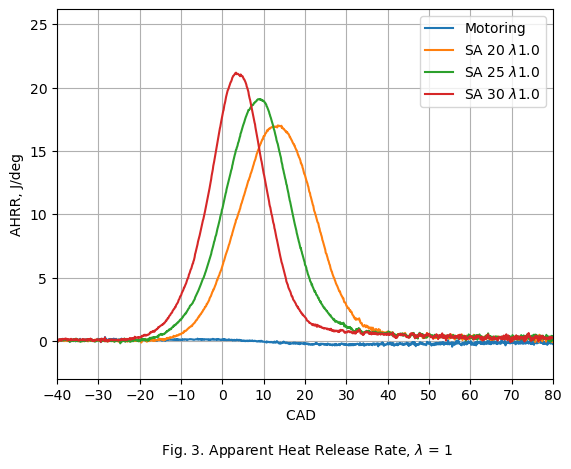

In [10]:
# Create apparent heat release rate plot Lambda 1
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHRR, J/deg')

F=str(Ff)
ax.set_xlabel('CAD  \n \n Fig. '+F+'. Apparent Heat Release Rate'+label_L1)
Ff=Ff+1

maxval=np.max([np.max(dQ_Test1_L1), np.max(dQ_Test2_L1), np.max(dQ_Test3_L1), np.max(dQ_Test4_L1)])
ylim=maxval+5
ax.set_xlim(-40, 80) #set axe limits
ax.set_ylim(-3, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(5)) # distribute major ticks on y axis


line, = ax.plot(cad_s-360, dQ_Test1_L1, label=label_Test1) #create multilple line plots
line, = ax.plot(cad_s-360, dQ_Test2_L1, label=label_Test2_L1)
line, = ax.plot(cad_s-360, dQ_Test3_L1, label=label_Test3_L1)
line, = ax.plot(cad_s-360, dQ_Test4_L1, label=label_Test4_L1)
ax.legend()
plt.show()

Redzams, ka agrāka aizdedze palielina sadedzes intensitāti. Savukārt brīvgriešanas režīmā novērojama pat negatīva siltuma izdalīšanās intensitāte, kas skaidrojama ar siltuma apmaiņu starp saspiesto, karsto gaisu un par to vēsākajām cilindra sienām.

<br><br>
Izveido diagrammu, lai novērotu, kā degmaisījuma sastāvs ietekmē sadedzes intensitāti.

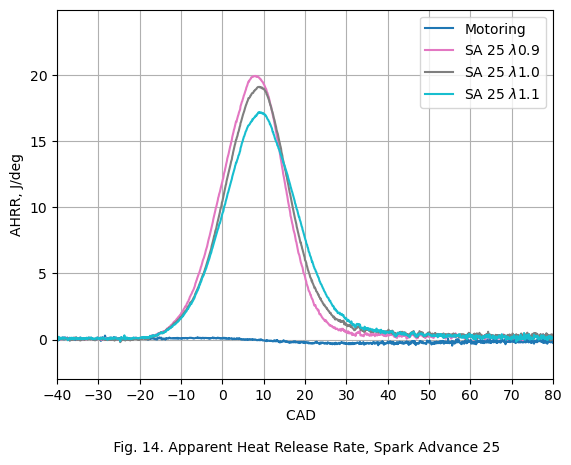

In [21]:
# Create apparent heat release rate plot SA25
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHRR, J/deg')

F=str(Ff)
ax.set_xlabel('CAD  \n \n Fig. '+F+'. Apparent Heat Release Rate, Spark Advance '+str(SA_Test3))
Ff=Ff+1

maxval=np.max([np.max(dQ_Test1_L09), np.max(dQ_Test3_L09), np.max(dQ_Test3_L1), np.max(dQ_Test3_L11)])
ylim=maxval+5
ax.set_xlim(-40, 80) #set axe limits
ax.set_ylim(-3, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(5)) # distribute major ticks on y axis


line, = ax.plot(cad_s-360, dQ_Test1_L09, label=label_Test1, color = 'C0') #create multilple line plots
line, = ax.plot(cad_s-360, dQ_Test3_L09, label=label_Test3_L09, color = 'C6')
line, = ax.plot(cad_s-360, dQ_Test3_L1, label=label_Test3_L1, color = 'C7')
line, = ax.plot(cad_s-360, dQ_Test3_L11, label=label_Test3_L11, color = 'C9')
ax.legend()
plt.show()

Ceturtajā attēlā var redzēt, kā degmaisījuma sastāvs ietekmē siltuma izdalīšanās intensitāti (jeb citiem vārdiem, ātrumu). Degšanas sākuma brīdis visiem attēlā parādītajiem izmēģinājuma režīmiem ir vienāds.

Integrējot siltuma izdalīšanās intensitātes datus, var iegūt šķietamo siltuma izdalīšanās daudzumu. Rezultāts izmēģinājuma režīmiem ar vienādu degmaisījuma sastāvu bet atšķirīgu aizdedzes apsteidzes leņķi parādīts nākošajā attēlā.

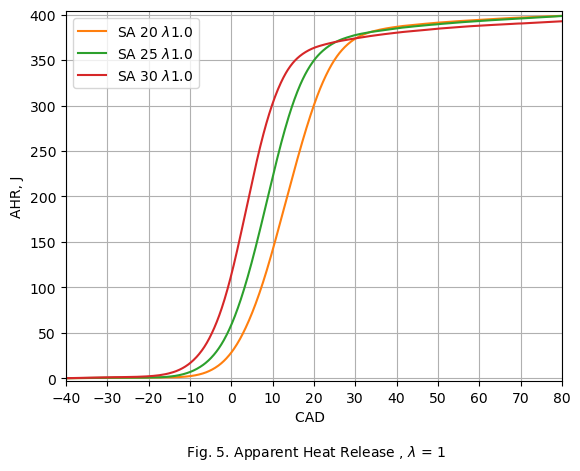

In [12]:
# Create apparent heat release plot Lambda 1
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHR, J')

F=str(Ff)
ax.set_xlabel('CAD  \n \n Fig. '+F+'. Apparent Heat Release '+label_L1)
Ff=Ff+1

maxval=np.max([np.max(Q_Test1_L1), np.max(Q_Test2_L1), np.max(Q_Test3_L1), np.max(Q_Test4_L1)])
ylim=maxval+5
ax.set_xlim(-40, 80) #set axe limits
ax.set_ylim(-3, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(50)) # distribute major ticks on y axis


#line, = ax.plot(cad_s-360, Q_Test1_L1, label=label_Test1) #create multilple line plots
line, = ax.plot(cad_s-360, Q_Test2_L1, label=label_Test2_L1, color = 'C1')
line, = ax.plot(cad_s-360, Q_Test3_L1, label=label_Test3_L1, color = 'C2')
line, = ax.plot(cad_s-360, Q_Test4_L1, label=label_Test4_L1, color = 'C3')
ax.legend()
plt.show()

Šķietamais siltuma daudzums izmēģinājuma režīmiem ar vienādu aizdedzes apsteidzi bet atšķirīgu degmaisījuma sastāvu parādīts nākošajā attēlā.

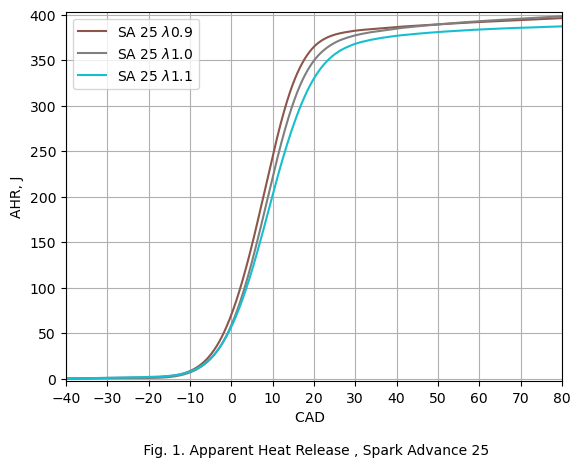

In [24]:
# Create apparent heat release rate plot SA25
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHR, J')

F=str(Ff)
ax.set_xlabel('CAD  \n \n Fig. '+F+'. Apparent Heat Release , Spark Advance '+str(SA_Test3))
Ff=Ff+1

maxval=np.max([np.max(Q_Test1_L09), np.max(Q_Test3_L09), np.max(Q_Test3_L1), np.max(Q_Test3_L11)])
ylim=maxval+5
ax.set_xlim(-40, 80) #set axe limits
ax.set_ylim(-3, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(50)) # distribute major ticks on y axis


#line, = ax.plot(cad_s-360, Q_Test1_L09, label=label_Test1, color = 'C0') #create multilple line plots
line, = ax.plot(cad_s-360, Q_Test3_L09, label=label_Test3_L09, color = 'C5')
line, = ax.plot(cad_s-360, Q_Test3_L1, label=label_Test3_L1, color = 'C7')
line, = ax.plot(cad_s-360, Q_Test3_L11, label=label_Test3_L11, color = 'C9')
ax.legend()
plt.show()

Var redzēt, ka gaisa/degvielas attiecības izmaiņas ietekmē gan kopējo siltuma daudzumu, gan sadedzes ilgumu. Maksimālo vērtību var salīdzināt ar teorētisko siltuma daudzumu $Q_{th}$, un novērtēt siltuma zudumus.

Pielīdzinot maksimālo izdalītā siltuma daudzumu 100%, var aprēķināt šķietamo relatīvo siltuma daudzumu.

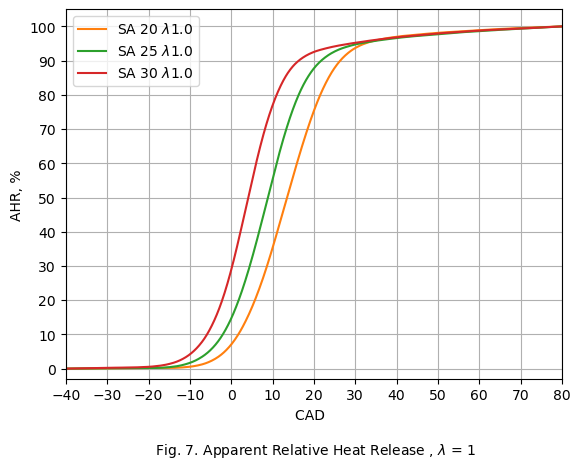

In [14]:
# Create apparent relative heat release plot Lambda 1
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHR, %')

F=str(Ff)
ax.set_xlabel('CAD  \n \n Fig. '+F+'. Apparent Relative Heat Release '+label_L1)
Ff=Ff+1

maxval=np.max([np.max(Qr_Test1_L1), np.max(Qr_Test2_L1), np.max(Qr_Test3_L1), np.max(Qr_Test4_L1)])
ylim=maxval+5
ax.set_xlim(-40, 80) #set axe limits
ax.set_ylim(-3, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on y axis


#line, = ax.plot(cad_s-360, Qr_Test1_L1, label=label_Test1) #create multilple line plots
line, = ax.plot(cad_s-360, Qr_Test2_L1, label=label_Test2_L1, color = 'C1')
line, = ax.plot(cad_s-360, Qr_Test3_L1, label=label_Test3_L1, color = 'C2')
line, = ax.plot(cad_s-360, Qr_Test4_L1, label=label_Test4_L1, color = 'C3')
ax.legend()
plt.show()

Diagramma izskatās līdzīga šķietamā siltuma daudzuma diagrammai, bet maksimālās vērtības ir savstarpēji izlīdzīnātas un
iegūtie dati ļauj savstarpēji salīdzināt un analizēt sadedzes procesa norisi gan dažādos izmēģinājuma apstākļos, gan lietojot atšķirīgus motorus.

Līdzīgi var aprēķināt un izveidot šķietamā relatīvā siltuma daudzuma diagrammu izmēģinājumu režīmiem ar vienādu aizdedzes apsteidzi bet atšķirīgu degmaisījuma sastāvu.

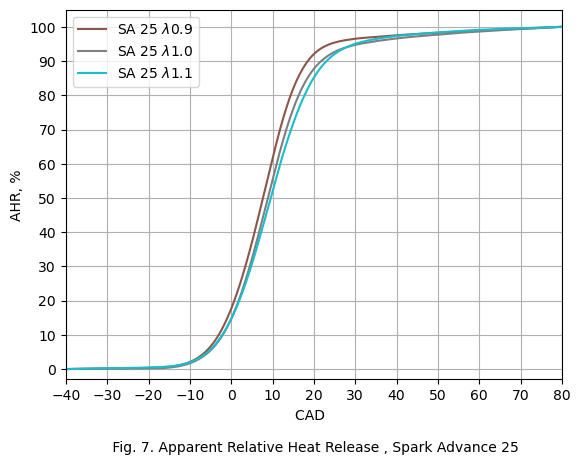

In [30]:
# Create apparent heat release rate plot SA25
fig, ax = plt.subplots()
ax.grid() #create grid
ax.set_ylabel('AHR, %')

F=str(Ff)
ax.set_xlabel('CAD  \n \n Fig. '+F+'. Apparent Relative Heat Release , Spark Advance '+str(SA_Test3))
Ff=Ff+1

maxval=np.max([np.max(Qr_Test1_L09), np.max(Qr_Test3_L09), np.max(Qr_Test3_L1), np.max(Qr_Test3_L11)])
ylim=maxval+5
ax.set_xlim(-40, 80) #set axe limits
ax.set_ylim(-3, ylim)
ax.xaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(10)) # distribute major ticks on y axis


#line, = ax.plot(cad_s-360, Qr_Test1_L09, label=label_Test1, color = 'C0') #create multilple line plots
line, = ax.plot(cad_s-360, Qr_Test3_L09, label=label_Test3_L09, color = 'C5')
line, = ax.plot(cad_s-360, Qr_Test3_L1, label=label_Test3_L1, color = 'C7')
line, = ax.plot(cad_s-360, Qr_Test3_L11, label=label_Test3_L11, color = 'C9')
ax.legend()
plt.show()

Precīza informācijas nolasīšana, lietojot diagrammu ir apgrūtināta. Tālab labāk interesējošo parametru vērtības atrast, uzrakstot programmas kodu. Pirmais parametrs, kura vērtību tādā veidā noteiksim, ir puses no šķietamā siltuma dauzuma leņķis jeb 50% no ARHR leņķis.

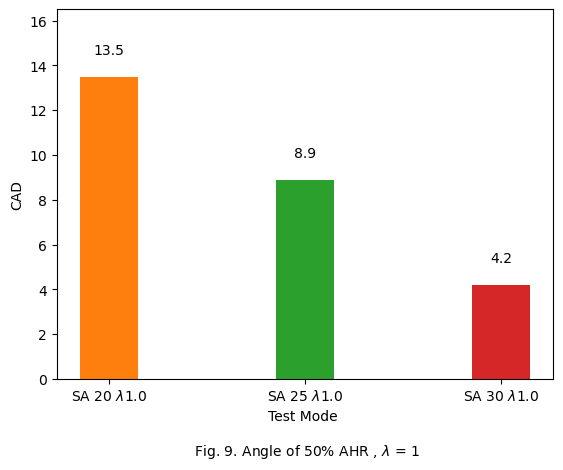

In [16]:
# Create bar plot for 50% AHR for Lambda 1
HR50cad = [HR50cad_Test2_L1,HR50cad_Test3_L1,HR50cad_Test4_L1]

x = np.arange(np.size(HR50cad)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR50cad,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (HR50cad[index]+1), str(np.round(HR50cad[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
F=str(Ff)
ax.set_xlabel('Test Mode \n \n Fig. '+F+'. Angle of 50% AHR '+label_L1)
Ff=Ff+1

ylim=np.round((np.max(HR50cad)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired_SA_L1)
plt.show()

Dzirksteļaizdedzes motoram 50% no ARHR atrašanās 8...10 CAD pēc augstākā maiņas punkta tiek uzskatīta par vienu no labākajām pazīmēm maksimālā griezes momenta (MBT) aizdedzes apsteidzes leņķa noteikšanai. 9. attēlā var redzēt, ka $\lambda$=1 izmēģinājuma režīmā MBT apstākļiem labi atbilst aizdedzes apsteidze 25 CAD.

Zinot MBT aizdedzes apsteidzes leņķa vērtību izmēģinājuma režīmama ar $\lambda$=1, var novērtēt, vai aizdedzes leņķis būtu jākoriģē $\lambda$=0.9 un $\lambda$=1.1 režīmos, lai arī tie atbilstu MBT.

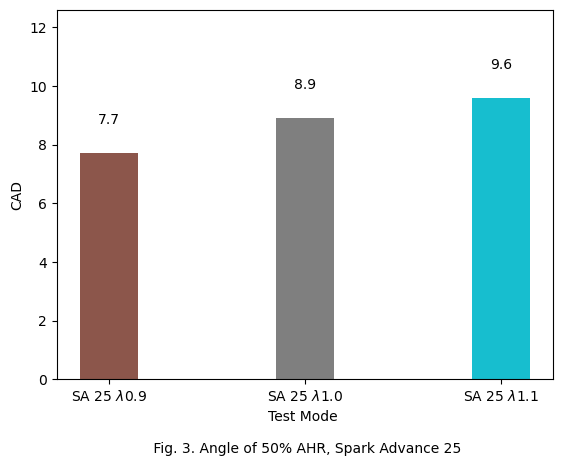

In [26]:
# Create bar plot for 50% AHR for SA 25
HR50cad = [HR50cad_Test3_L09,HR50cad_Test3_L1,HR50cad_Test3_L11]

x = np.arange(np.size(HR50cad)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR50cad,width=0.3,color=['C5', 'C7', 'C9'])

for index, value in enumerate(x):
    plt.text(value, (HR50cad[index]+1), str(np.round(HR50cad[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
F=str(Ff)
ax.set_xlabel('Test Mode \n \n Fig. '+F+'. Angle of 50% AHR, Spark Advance '+str(SA_Test3))
Ff=Ff+1

ylim=np.round((np.max(HR50cad)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired_SA_25)
plt.show()

Aplūkojot 10. attēlu, redzams, ka arī nedaudz treknam vai liesam degmaisījuma aizdedzes apsteidzi nav vērts koriģēt pēc MBT kritērija, ja tā MBT apsteidze jau iestatīta stehiometriskam maisījumam. Šajā izmēģinājumā sērijā nevērtējam detonācijas risku, jo šajos salīdzinoši zemas slodzes režīmos šī parādība nav novērojama. Augstākas slodzes režīmos aizdedzes apsteidzi bieži vien ierobežo detonācija.

Liesmas attīstības fāze ir nozīmīgs parametrs, kas raksturo aizdedzes sistēmas un degvielas parametrus, jo tajā liesmas pārsvarā attīstās lamināros apstākļos, un to īpaši neietekmē turbulence degkamerā. Par liesmas attīstības fāzes ilgumu parasti pieņem brīdi no aizdedzes dzirksteles padošanas līdz 1, 5 vai 10% no ARHR. Ilgumu parasti izsaka grādos, bet dažkārt arī laika mērvienībās, ms. Liesmas attīstības fāze ir salīdzinoši ilga, kā to var redzēt AHR diagrammās. Aizdedzes apsteidzes ietekme un liesmas attīstības fāzes ilgumu parādīta 11. attēlā.

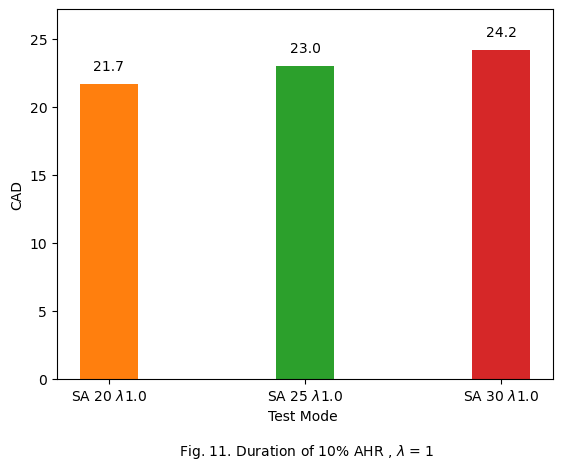

In [18]:
# Create bar plot for 10% AHR for Lambda 1
HR10 = [HR10_Test2_L1,HR10_Test3_L1,HR10_Test4_L1]

x = np.arange(np.size(HR10)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR10,width=0.3,color=['C1', 'C2', 'C3'])

for index, value in enumerate(x):
    plt.text(value, (HR10[index]+1), str(np.round(HR10[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
F=str(Ff)
ax.set_xlabel('Test Mode \n \n Fig. '+F+'. Duration of 10% AHR '+label_L1)
Ff=Ff+1

ylim=np.round((np.max(HR10)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired_SA_L1)
plt.show()

Degmaisījuma sastāva ietekmi uz liesmas attīstības fāzi var redzēt 12. attēlā.

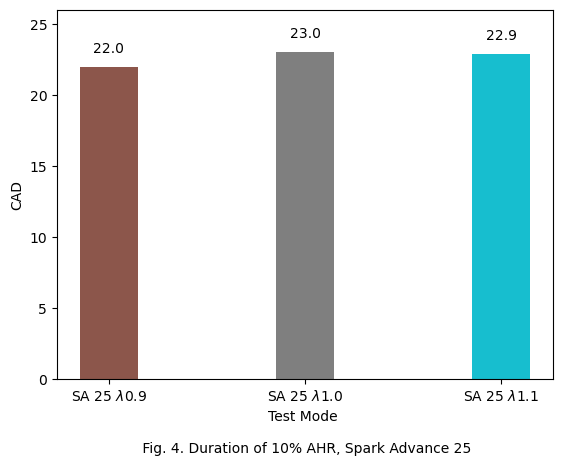

In [27]:
# Create bar plot for 10% AHR for SA 25
HR10 = [HR10_Test3_L09,HR10_Test3_L1,HR10_Test3_L11]

x = np.arange(np.size(HR10)) # creates array for bar order
fig, ax = plt.subplots()
plt.bar(x, HR10,width=0.3,color=['C5', 'C7', 'C9'])

for index, value in enumerate(x):
    plt.text(value, (HR10[index]+1), str(np.round(HR10[index],1)),horizontalalignment='center')
    
ax.set_ylabel('CAD')
F=str(Ff)
ax.set_xlabel('Test Mode \n \n Fig. '+F+'. Duration of 10% AHR, Spark Advance '+str(SA_Test3))
Ff=Ff+1

ylim=np.round((np.max(HR10)+3),2)
ax.set_ylim(0, ylim)
plt.xticks(x, labels_line_fired_SA_25)
plt.show()

<center> <h2> Papilduzdevums

Paveicot pamatuzdevumu, var iegūt maksimālo vērtējumu 6 balles. Ar papilduzdevumu vērtējumu var palielināt par 4 ballēm. Šajā laboratorijas darba daļā papilduzdevums ir izveidot koda fragmentus, kas stabiņu diagrammā parāda sadedzes ilgumu no 10 līdz 50% no AHR, kā arī no 10 līdz 90% no AHR. Parādīt gan aizdedzes apsteidzes, gan degmaisījuma sastāva ietekmi uz šo sadedzes procesa daļu ilgumu, kā arī izskaidrot iegūto rezultātu.

<center> <h2> Izmantotā literatūra

1. *J. B. Heywood*, ***Internal Combustion Engine Fundamentals***, 2018.
2. *R. Stone*, ***Internal Combustion Engines***, 1999.